Choosing the right metric is a very important phase in any Machine Learning Problem. They are many metrics we can choose for a particular problem but it might not be the best one.
In this blog post, we'll present the most used performance metrics used for a Machine Learning binary classification problem. We'll discuss cases where you'll want to use one instead of others. We'll also show how  to compute those metrics using scikit-learn.

To make this more practical, we'll try to predict Breast Cancer as Benign or Malignant using a SVM classifier and compute the metrics to evaluate the model.

# Loading the Dataset 

The Data can be downloaded on Kaggle: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data , but it's already avalaible in the scikit-learn dataset module

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
cancer.data.shape, cancer.target.shape

((569, 30), (569,))

We have 569 training instances and 30 variables in our dataset

In [3]:
print({n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

{'malignant': 212, 'benign': 357}


We have here 212 malignant breast cancer examples (The negative class, representend by 0 in the target variable) and 357 benign breast cancer examples( the positive class, represented by 1 in the target variable).

Every binary classification problem can be think of as yes/no problem. Here the question is: Is this cancer a benign one? in the target variable, 0 means No ,so Malignant is the negative class, 1 means Yes, so Benign is the positive class.

Normally, we would do an Exploratory Data Analysis to better understand the features, but it would make this post too long and it's not the purpose here. We can still look at the features names:

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Model Training and Prediction

We'll train an SVM classifier on 75% of the data and test it on the 25% remaining. We have to make sure each class has the same frequency in both training and test set. the stratify parameter can help with that.

In [5]:
from sklearn.model_selection import train_test_split

We'll set the random_state parameter, so you can have the same result if you decide to run the code yourself

In [6]:
X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target, random_state = 42)

In [7]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

Let's now use the scikit-learn SVC class to fit the training set

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression(random_state = 2)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_pred = clf.predict(X_test)

# Accuracy

Accuracy is the most intuitive performance Metric. It's the number of correct predictions over all predictions made. It's the default performance metric in scikit Learn. We can compute the accuracy in two ways: using the accuracy_score() method or the score() method:

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_true= y_test, y_pred= y_pred)

0.958041958041958

In [13]:
clf.score(X_test, y_test)

0.958041958041958

Under the hood the score method use the predict and the accuracy score. You can look at the source code by running **??clf.score**

While it's easy to interpret the accuracy, it's usually not the best metric. It's doesn't give enough information about the instances the classifier missed. PLus, while we might think that a 90% accuracy is good, it isn't when our data is imbalanced. Let's say that a class A make 90% of the data and a class B make only 10%. A dummy classifier that classified every samples as A can have a 90% of accuracy.

# Confusion Matrix

A much better way to evaluate the performance is to look at the confusion matrix. The confusion matrix give us information about the correct predictions and the errors. It's a two-by-two array, where the rows correspond
to the true classes and the columns correspond to the predicted classes. Here is what the confusion matrix looks like.
![confusion matrix](conf.png)

Let's look at the code to output confusion matrix for our prediction task and explain later what TP, TN, FP, FN means

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48  5]
 [ 1 89]]


**Correct Predictions**

* TN = True Negative = 48. True negatives are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False). In this case, it means that in the test set, 48 cases of malignant cancer were correctly classified.

* TP = True Positive = 89. True positives are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True). In this case, it means that in the test set, 89 cases of benign cancer were correctly classified.

**Errors**

* FP = False Positive = 5. False positives are the cases when the actual class of the data point was 0(False) and the predicted is 1(True). **False** is because the model has predicted incorrectly and **positive** because the class predicted was a positive one(1). Here it means that in the test set, 5 cases of Malignant Cancer (Negative class) were incorrectly classified as Benign (Positive Class).

* FN = False Negative = 1. False negatives are the cases when the actual class of the data point was 1(True) and the predicted is 0(False). **False** is because the model has predicted incorrectly and **negative** because the class predicted was a negative one(0). Here it means that only one case of Benign cancer was incorrecly classified as Malignant.

To better understand this, look at the picture below: The yes/no question here is: Is the person pregnant? An answer is a false positive when We classify a Man as pregnant and a false negative when a classify a pregnant woman as not pregnant.

To get good predictions, we usually care about reducting the false positive or the false negative, depending on the situation, or the business impact.

![Fp and FN](fpandfn.jpg)


Using the confusion matrix, we can say that the accuracy is : **(TN+TP)/(TN+TP+FN+FP)** . Having 0 False Positive and 0 False negative is the ideal scenario. That means 100% accuracy.

#  Precision and Recall

Another way to summarize the confusion matrix is Precision and Recall.

## Precision 

**Precision = TP/(TP+FP)**

Precision measures how many of the samples predicted as positive are actually positive. We use Precision when we care about reducing the False positives. Consider a situation where you want to predict if a video on youtube is a good content for a child.
Good Content is the positive class, and bad content is the negative class. Here you'll prefer that every video classified as positive is really positive, even if some videos with good content will be classified as negative(false negative).
Another example is when you want a classifier you tag emails as spam or not spam. Spam is the positive class, Not spam is the negative class. Here also, you'll want the classifier to be really sure when it says an email is a spam, even if some spams emails might be classified as not spam(false negative). A good precision is required here. Let's now compute the precision of our svm classifier:

In [16]:
from sklearn.metrics import precision_score

In [17]:
precision_score(y_true=y_test, y_pred=y_pred)

0.9468085106382979

We can verify the answer by using the equation : Precision = TP/(TP+FP)

In [18]:
89/(89+5)

0.9468085106382979

But the problem with precision is that it's simple to have a 100% Precision. You just have to predict one instance as positive and make sure that it's really positive. In the above situation, to have a 100% precision,you just have to predict one video a make sure it's really a good one.

## Recall

**Recall = TP/(TP+FN)**

Recall (or **Sensitivity** or **True positive rate**) measures how many of the positive samples are captured by the positives predictions. We use the Recall when it's important to identify all positive samples. It means we care about reducing the false negatives. Let's say you need to build a classifier to detect shoplifters. Here shoplifter is the positive class, Not shoplifter is the negative class. In this situation, you'll care about detecting all the shoplifters, even if some not shoplifters will be classified as shoplifters(False positive). Let's now compute the recall of our svm classifier:

In [19]:
from sklearn.metrics import recall_score

In [20]:
recall_score(y_true=y_test, y_pred=y_pred)

0.9888888888888889

Let's verify the answer by using the equaion: Recall  = TP/(TP+FN)

In [21]:
89/(89+1)

0.9888888888888889

## Precision-Recall Tradeoff

There is a trade-off between Precision and Recall. You can easily have a 100% recall by classifying every sample as positive. You won't then have any False negative (and any True Negative either). But in doing so, you'll have a lot of False positives,thus having a very low precision. We already said that you can easily have a 100% but in doing so you'll get a lot of false negatives, thus a very low Recall. We can get a better sense of this trade-off by looking at the **precision recall curve**. The classifiers in scikit-learn either have a predict_proba() method or a decision_function method. Instead of getting the predictions, this methods return a score or a probability. The predict_proba method return probabilities between 0 and 1 and by default when a sample is classified positive when his probability is greater than 0.5. The decision_function return thresholds and by default a sample is classified positive when his threshold is greater than 0. Let's plot the precision_recall curve of our LogisticRegression classifier using his predict_proba method:

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
precisions,recalls,probas = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

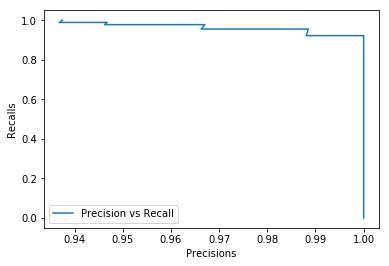

In [38]:
plt.plot(precisions,recalls, label = 'Precision vs Recall')
plt.xlabel('Precisions')
plt.ylabel('Recalls')
plt.legend(loc = 'best')
plt.savefig('precision_recall_curve.png')
plt.show()

Here we can say that our classifier is quite good but we can still see that we can get a 100% precision by reducing the recall or get a 100% recall by reducing the precision. You can then chose reduce or increase the threshold of 0.5 depending on the outcome you want.

## f1-score

Precision and Recall are the most used performances metrics but to get the full picture, we can use the f1 score, also called the f1 measure. It's the harmonic mean of precision and Recall:

F1-score = 2*(Precision * recall)/(Precision + Recall)

THe F1_score gives more weights to lower values and favors values that are equal. You'll get a higher f1_score only if your precision and your recall are high too. Let's compute the f1_score of our classifier:

In [25]:
from sklearn.metrics import f1_score

In [26]:
f1_score(y_true=y_test, y_pred=y_pred)

0.9673913043478262

Instead of computing each of this values, i mean precision, recall and f1 score, each with a different function, we can get all of them in one output with the classification_report method:

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.98      0.91      0.94        53
          1       0.95      0.99      0.97        90

avg / total       0.96      0.96      0.96       143



# Area under the ROC curve

The Receiver operating characteristics (ROC) curve, like the precision recall curve, consider all the different threshold possible, but it instead of showing precision, it shows the True Positive Rate(another name for the recall) against the False Positive Rate(FPR). The false positive rate is the fraction of false positives out of all negative samples:

**FPR = FP/(FP+TN)**

We can compute the roc curve of our model using the roc_curve function

In [29]:
from sklearn.metrics import roc_curve

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

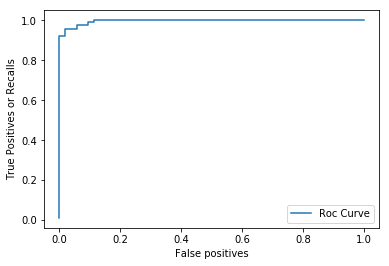

In [37]:
plt.plot(fpr, tpr, label = 'Roc Curve')
plt.xlabel('False positives')
plt.ylabel('True Positives or Recalls')
plt.legend(loc = 'best')
plt.savefig('roc_curve.png')
plt.show()

Here we can see that, we can get slightly better Recall by increasing a little bit the number of False positives. The ideal scenario here is when the curve is close to the top left. But we would like to use a number to estimate how close the curve is to the top left corner. For that we use the **Area Under the Curve** or **AUC** for short. Let's compute our model's AUC:

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
roc_auc_score(y_true=y_test, y_score=y_pred)

0.9472746331236898

The AUC is usually used when we have imbalanced data. While it's not easy to interpret, the Auc helps to have a really sense of how well our model is, instead of having a biaised metrics like accuracy.

# Wrapping up and Additional Resources

Key takeaways from this post are:

* Accuracy is the default metric in scikit-learn but it is not a good metric for imbalanced data.Often you care about either reducing False positive or False negative.

* Precision and Recall are better metrics for specific cases where we care about precisions or capturing all the positive samples. But it's relatively possible to get a certain precision at a cost of a recall and vice-versa.

* F1_score is a better metric when we care about high precision and high recall

* The Area under curve is a better metric for imbalanced Data and the Roc curve can help chose a specific threshold to have a desired output.

If you want to learn better about this metrics and other ones i would suggest the Book [Introduction to Machine Learning with Python](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413) and the book [Hands-on Machine Learning with Scikit-learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291)

Thanks for Reading and feel free to contact me on [Twitter](https://twitter.com/Kayveen_d) or on [LinkedIn](https://www.linkedin.com/in/kevin-degila-9164b5151/) for any constructive criticism.